In [1]:
%matplotlib inline  

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Loading in data 
adj =  np.genfromtxt('Inputs/adj.csv', delimiter=',', dtype=np.int8)
data = np.genfromtxt('Inputs/data.csv', delimiter=',')

In [3]:
tetrode_adj = [
    [0, 1],
    [1, 0], 
    [0, 4], 
    [4, 0],
    [1, 5],
    [5, 1],
    [4, 5], 
    [5, 4], 
    
    [2, 3],
    [3, 2], 
    [2, 6], 
    [6, 2],
    [3, 7],
    [7, 3],
    [6, 7],
    [7, 6],
    
    [8, 9],
    [9, 8],
    [8, 12],
    [12, 8],
    [9, 13],
    [13, 9],
    [12, 13],
    [13, 12],
    
    [10, 11],
    [11, 10],
    [10, 14],
    [14, 10],
    [11, 15],
    [15, 11], 
    [14, 15],
    [15,14]
]

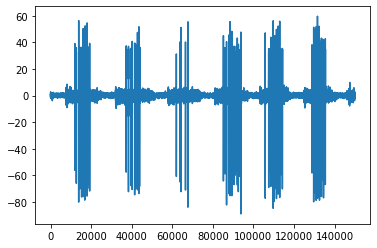

In [4]:
# Plotting the first channel 
plt.plot(data[:,1])
plt.show()

In [5]:
# Figuring out how to generate dummy data

# Sinusodal data
def gen_dummy_data():
    # TODO: Paramterize this so it can change size, perhaps function o_O
    return np.asarray([np.sin(np.arange(0,100,.1))]*16).transpose()
    
def gen_dummy_adj():
    # TODO: No clue, this is hard coded
    tmp = []
    for i in range(1,16,2):
        tmp.append([i-1, i])
        tmp.append([i, i-1])
    return np.asarray(tmp)


In [6]:
# Generating dummy data with unique spike templates 

# Generating spike times 
def gen_spike_times(numSpks, lim, numTemplates, numChans):
    """numSpks: # of spikes, lim: length of data, numTemplates: # of templates, numChans: # of channels"""
    spkTimes = []
    spkChans = []
    for i in range(numTemplates):
        spkTimes.append(np.random.choice(range(lim), numSpks, replace = False))
        spkChans.append(np.random.choice(range(numChans), numSpks, replace=True))
    return np.asarray(spkTimes), np.asarray(spkChans)

# Generating spike template
def gen_spike_templates(numSpks,muWidth=90,sigmaWidth=10, muFac=0.1, sigmaFac=0.02, muVert=200, sigmaVert=40):
    """
    numSpks: # of Spikes, muWidth: mean width of spike, sigmaWidth: stdev of spike width, muFac: mean width fator, 
    sigmaFac: stdev of spike factor, muVert: mean vertical scaling factor, sigmaVert: stdev of vertical scaling factor
    """
    from scipy import signal 
    
    waveforms = []
    
    for i in range(numSpks):
        width = sigmaWidth * np.random.randn() + muWidth 
        factor = (np.abs(sigmaFac*np.random.randn()+muFac))*width
        polarity = np.random.choice([1,-1], 1)[0]
        vertical = sigmaVert*np.random.randn()+muVert
        # Add a linear equations on top | super impose multiple rickers
        waveforms.append(polarity*signal.ricker(width, factor)*vertical)
    return np.asarray(waveforms, dtype=object)

In [7]:
# Plotting of waveforms 
def plot_waveforms(wave):
    fig, axs = plt.subplots(4,4)
    fig.set_figheight(20)
    fig.set_figwidth(20)
    plt.grid=True
    
    # Loop variables 
    count, minY, maxY = 0, float('inf'), -float('inf') 
    
    for i in range(4):
        for j in range(4):
            axs[i][j].plot(wave[count])
            minY = min(min(wave[count]),minY)
            maxY = max(max(wave[count]),maxY)
            count += 1
    
    # Updating Y scale 
    for i in range(4):
        for j in range(4):
            axs[i][j].set_ylim((minY-1, maxY+1))
    
    plt.show()
    return fig, axs

In [8]:
# Generating dummy data set with cool hats 
def generate_hat_data(numSpks, lim, numTemplates, numChans, muWidth=90, sigmaWidth=10, muFac=0.1, sigmaFac=0.02, muVert=25, sigmaVert=5, seed = False):
    if seed:
        np.random.seed(1738)
    
    times, chans = gen_spike_times(numSpks, lim, numTemplates, numChans)
    
    waveforms = gen_spike_templates(numTemplates, muWidth, sigmaWidth, muFac, sigmaFac, muVert, sigmaVert)
    
    # Generating zeros matrix 
    tmp = np.zeros((numChans, lim))
    spikes_inserted = []
    
    for i in range(numTemplates):
        for j in range(numSpks):
            wave = waveforms[i]
            spkTime = times[i][j]
            spkChan = chans[i][j]
            radius = wave.shape[0]//2
            if spkTime - radius > 0 and spkTime + radius + 1 < lim: 
                if wave.shape[0] % 2 == 0:
                    tmp[spkChan][spkTime-radius:spkTime+radius] += wave
                else:
                    tmp[spkChan][spkTime-radius:spkTime+radius+1] += wave
                
                spikes_inserted.append([i,spkTime,spkChan])
    return tmp, np.asarray(spikes_inserted)
            

def insert_spike():
    pass

dummy_data, dummy_spikes = generate_hat_data(10, 1000, 10, 16, seed=True)

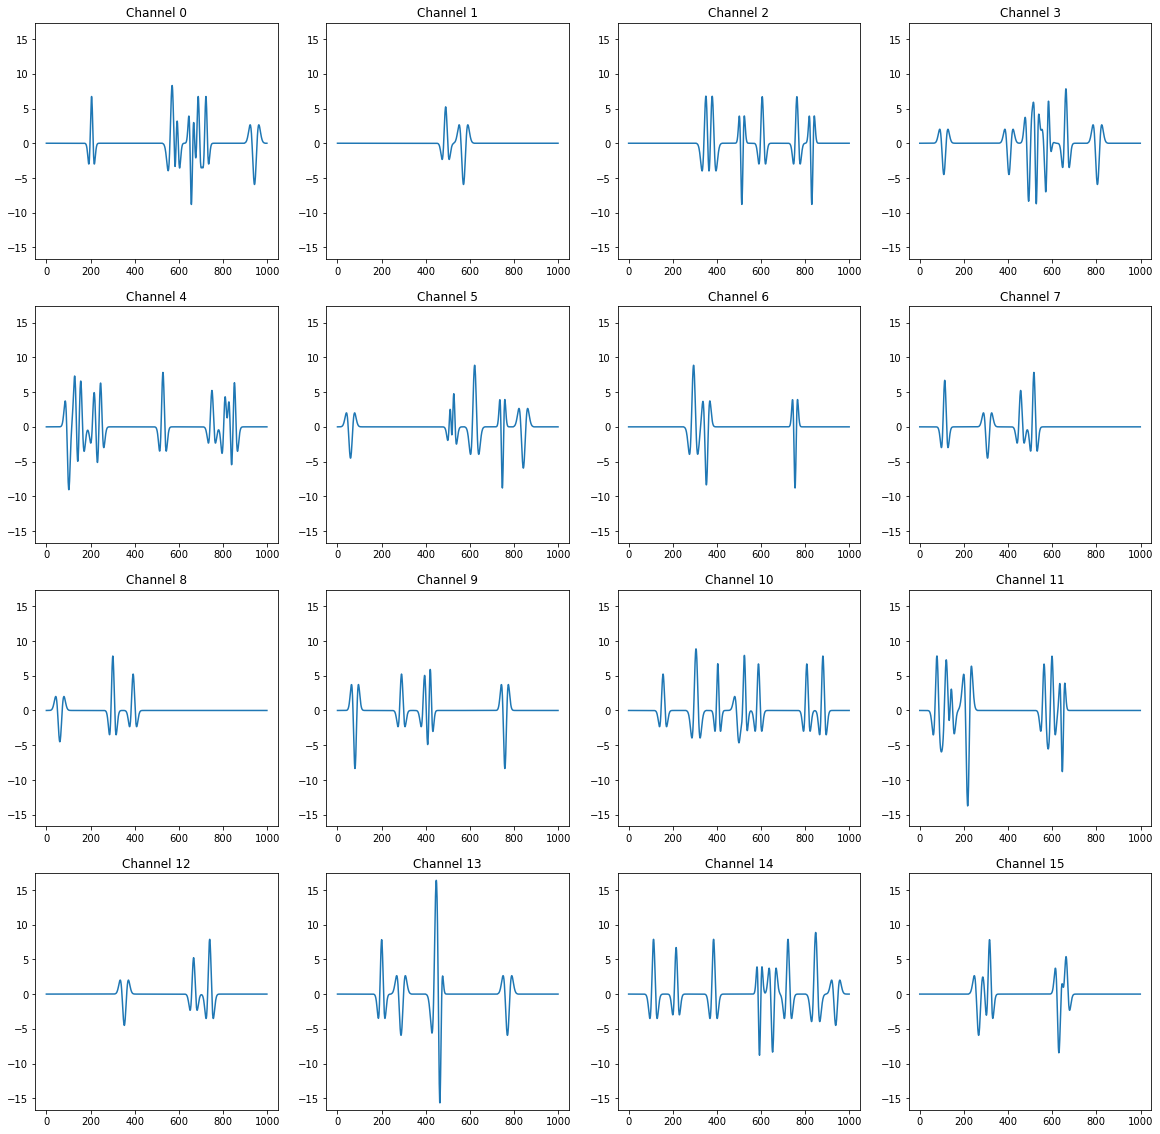

In [9]:
def plot_dummy_data(data):
    fig, axs = plt.subplots(4,4)
    fig.set_figheight(20)
    fig.set_figwidth(20)
    plt.grid=True
    
    # Loop variables 
    count, minY, maxY = 0, float('inf'), -float('inf') 
    
    for i in range(4):
        for j in range(4):
            axs[i][j].plot(data[count])
            axs[i][j].set_title("Channel {}".format(count))
            minY = min(min(data[count]),minY)
            maxY = max(max(data[count]),maxY)
            count+= 1 
    
    # Updating Y scale 
    for i in range(4):
        for j in range(4):
            axs[i][j].set_ylim((minY-1, maxY+1))
    
    plt.show()
    return fig, axs
a,b = plot_dummy_data(dummy_data)

In [10]:
"""
NOTE: Hard coding for {(0,1), (2,3) ...} adjacency matrix
Psuedo code for new synthetic data creation

# PARAMS
* # of channels, # of templates per channel, # of spikes per template
* Decay factor, offset factor
* Waveform factors: spkHeight, spkWidth 

# SETUP STEPS
* Create empty array (num samples x num channels)

# GENERATE WAVEFORMS 
* params: # of channels, # of templates, # of spikes per template
* opt params: decay factor, offset factor, waveform factors (spkHeight, spkWidth, etc.)
* Generate waveforms, store in np array of (voltage x width x # of templates)

# GENERATE SPIKETIMES
* Go through each waveform, assign it randomly to a channel 
* Extract it's adjacent channel, create a lead,follow channel pair
* Create a set of spike times for the lead channel, use offset param to shift it for follow channel
* Create this as a np array of (channel x # templates) [i,j] = lead / follow times
* Create an array (channel x # templates) [i,j] = scaling factor for template on specific channel
* Do this for each waveform, and have an np array of the above called spk times

# GENERATING DATA
* Iterate through each of the templates, pull out waveform, channel, spk times 
* Inject the appropriate spike into specified channel with specified decay factor
* Repeat for all waveforms
* Add gaussian noise across all channels (parametrize this) 

return data, spk times

"""
print('')

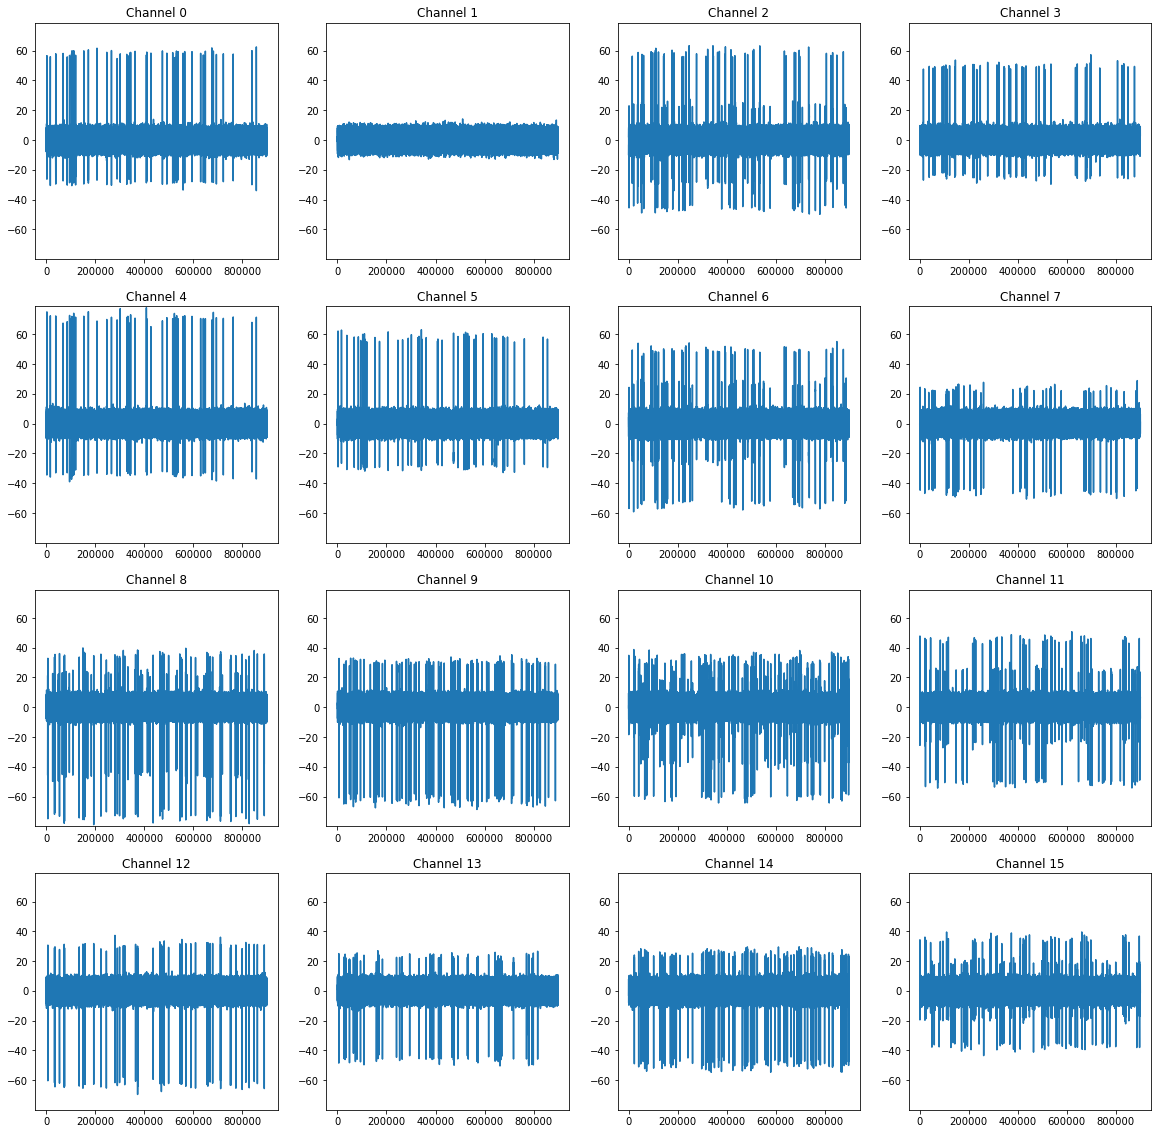

In [11]:
def gen_rel_data(N, adj, nChans, nSpks, nTemplates, offsetMu = 40, offsetSig = 5, decayMu = 0.8, decaySig = 0.05, noiseMu = 0, noiseSig = 1, seed=False, noise=True):
    if seed:
        np.random.seed(1738)
    
    # Setup Steps
    data = np.zeros(shape=(nChans, N))
    
    # Generate Waveforms 
    waveforms = gen_spike_templates(nTemplates)
    
    # Generate Spiketimes 
    # Creating lead - follow pairs
    chanAssign = np.random.choice(range(nChans), size=nChans, replace=False)
#     for i in range(nTemplates):
#         chanAssign.append(np.random.choice(range(nChans), replace=True))
    
    # Generating sets of spiking channels
    chans = []
    for x in chanAssign:
        tmp = [x]
        for pair in adj: 
            if pair[0] == x:
                tmp.append(pair[1])
        chans.append(tmp)

    # Assigning times to those pairs
    times = []
    for pair in chans:
        leadTimes = np.random.choice(range(100, N-100), nSpks, replace = False)
        offset = int(offsetSig*np.random.randn()+offsetMu)
        followTimes = leadTimes + offset
        times.append((leadTimes, followTimes))

    # Generating Data
    for i in range(nTemplates): 
        wave = waveforms[i]
        radius = wave.shape[0] // 2
        leadChan = chans[i][0]
        followChans = chans[i][1:]
        # Lead
        leadTimes = times[i][0]
        for t in leadTimes:
            if wave.shape[0] % 2 == 0:
                data[leadChan][t-radius:t+radius] += wave
            else:
                data[leadChan][t-radius:t+radius+1] += wave
        # Follow
        followTimes = times[i][1]
        decay = decaySig*np.random.randn() + decayMu
        for t in followTimes:
            if wave.shape[0] % 2 == 0:
                for followChan in followChans:
                    data[followChan][t-radius:t+radius] += wave*decay
            else:
                for followChan in followChans:
                    data[followChan][t-radius:t+radius+1] += wave*decay
        
        if noise:
            for channel in data:
                channel += noiseSig*np.random.randn(N,) + noiseMu
    return data
bruh = gen_rel_data(30*30000, tetrode_adj, 16, 50, 8, offsetMu = 20, seed=False) 
fig = plot_dummy_data(bruh)

/Users/samir/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


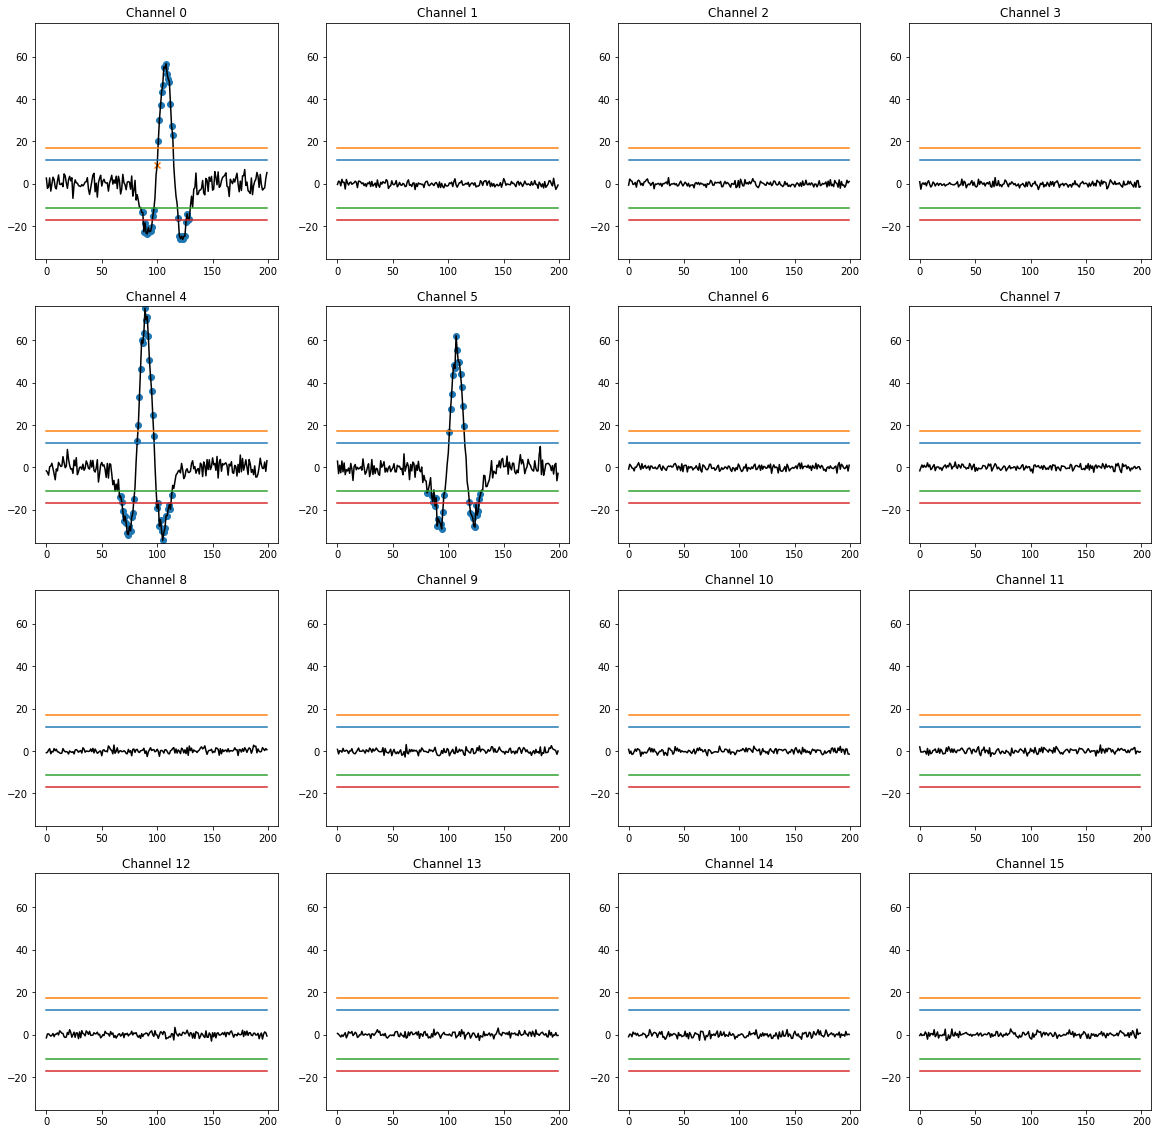

In [12]:
from flood import * 
# offsetMu = [15,20], offsetSig = 0, decayMu = 0.8, decaySig = 0.05, noiseMu = 0, noiseSig = 1
# Floodfill pre range check breaks at this point on inverted hat waveforms ^ 
ff = FloodFill(bruh.transpose(), tetrode_adj)
ff.detect_spikes(weakMul = 4, strongMul = 6, refr =10)
ff.plotSpk(0, wf=True, seed=True), len(ff.spk[0])
waves = ff.getWave(100)

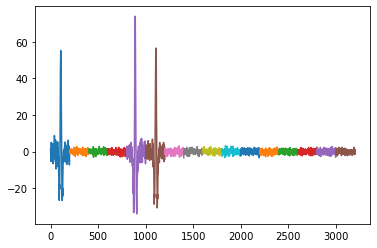

In [13]:
ff.plotWaves(30, 200)

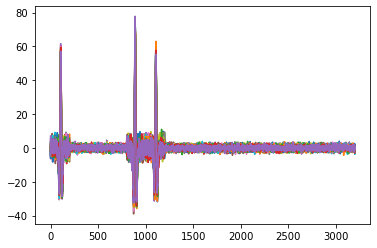

In [14]:
tp = np.asarray(ff.waves)
for i in range(25):
    plt.plot(ff.waves[i])

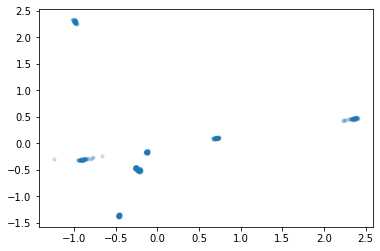

In [15]:
from mpl_toolkits import mplot3d
from sklearn.decomposition import PCA
pca = PCA(n_components=3, whiten= True)
pca.fit(waves)
pca_data = pca.transform(waves)
plt.scatter(pca_data[:, 0], pca_data[:, 1], 10, alpha = 0.2)
# # Creating figure
# fig = plt.figure(figsize = (10, 7))
# ax = plt.axes(projection ="3d")
 
# # Creating plot
# ax.scatter3D(pca_data[:,0], pca_data[:,1], pca_data[:,2], color = "green")
# plt.title("simple 3D scatter plot")
 
# # show plot
# plt.show()

In [16]:
ffReal = FloodFill(data, adj)
ffReal.detect_spikes(refr=5)

/Users/samir/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


array([[455.3497031840099, 885.0433734807148, 7557.938594716322, ...,
        130121.49673001636, 131118.55726846942, 134290.68923814304],
       [array([[447,   0],
       [447,   4],
       [448,   4],
       [448,   0],
       [445,   0],
       [446,   0],
       [449,   0],
       [449,   4],
       [450,   4],
       [450,   0],
       [450,   1],
       [450,   5],
       [450,   6],
       [450,   2],
       [445,   2],
       [446,   2],
       [446,   3],
       [447,   3],
       [447,   2],
       [447,   6],
       [448,   6],
       [448,   2],
       [449,   2],
       [449,   6],
       [451,   3],
       [452,   3],
       [453,   3],
       [454,   3],
       [455,   3],
       [456,   3],
       [456,   7],
       [457,   7],
       [457,   3],
       [457,   2],
       [458,   2],
       [458,   3],
       [458,   7],
       [459,   7],
       [459,   3],
       [459,   2],
       [460,   7],
       [461,   7],
       [462,   7],
       [465,   7],
       [465,   3]

In [38]:
waves = ffReal.getWave(100)
tp = np.asarray(ffReal.waves)
for i in range(25):
    plt.plot(ffReal.wavpca = PCA(n_components=3, whiten= True)
pca.fit(waves)
pca_data = pca.transform(waves)
plt.scatter(pca_data[:, 0], pca_data[:, 1], 10, alpha = 0.2)es[i])

SyntaxError: invalid syntax (<ipython-input-38-ccf5d8c178ef>, line 5)

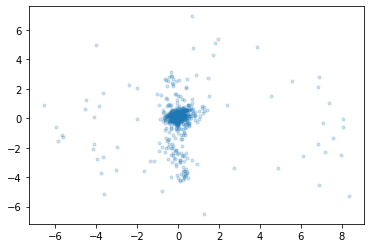

In [39]:
pca = PCA(n_components=3, whiten= True)
pca.fit(waves)
pca_data = pca.transform(waves)
plt.scatter(pca_data[:, 0], pca_data[:, 1], 10, alpha = 0.2)